In [1]:
import os
from shutil import rmtree
from src.test_problem import setup_solver
from src import nk_driver

import xarray as xr
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
wdir = os.path.join(os.getenv("HOME"), "test_run_phosphorus_wdir")
if os.path.exists(wdir):
    if os.path.isfile(wdir):
        os.remove(wdir)
    else:
        rmtree(wdir)

In [3]:
common_args = ["--workdir", wdir, "--tracer_module_names", "phosphorus"]

In [4]:
setup_solver.main(setup_solver.parse_args(common_args + ["--fp_cnt", "1"]))

2020-06-03 16:21:17,448:57669:setup_solver.py:main:args.cfg_fname="/Users/klindsay/codes/Newton-Krylov_OOC/input/test_problem/newton_krylov.cfg"
2020-06-03 16:21:17,452:57669:gen_invoker_script.py:gen_invoker_script:generating /Users/klindsay/test_run_phosphorus_wdir/nk_driver.sh
2020-06-03 16:21:17,457:57669:setup_solver.py:main:grid_weight_fname="/Users/klindsay/test_run_phosphorus_wdir/depth_axis_test.nc"
2020-06-03 16:21:17,480:57669:setup_solver.py:main:fp_iter=0
2020-06-03 16:21:34,171:57669:setup_solver.py:main:init_iterate_fname="/Users/klindsay/test_run_phosphorus_wdir/gen_init_iterate/init_iterate.nc"


In [5]:
def plot_all_vars(ds):
    print(ds)
    for varname in ds.data_vars:
        if "bounds" in varname:
            continue
        plot_da = ds[varname].isel(time=slice(1,-1)) if "time" in ds[varname].dims else ds[varname]
        if sum([dimlen>1 for dimlen in plot_da.shape]) > 1:
            cbar_kwargs = {"orientation": "horizontal"}
            plt_ret = plot_da.plot(cbar_kwargs=cbar_kwargs)
        else:
            plt_ret = plot_da.plot()
        plt.title(varname)
        if "fcn_norm" in varname or "increment_norm" in varname:
            plt.yscale("log")
        plt.show()

<xarray.Dataset>
Dimensions:  (depth: 30)
Dimensions without coordinates: depth
Data variables:
    po4      (depth) float64 ...
    dop      (depth) float64 ...
    pop      (depth) float64 ...
    po4_s    (depth) float64 ...
    dop_s    (depth) float64 ...
    pop_s    (depth) float64 ...
Attributes:
    history:  2020-06-03 16:21:17: created by src.test_problem.model_state.Mo...


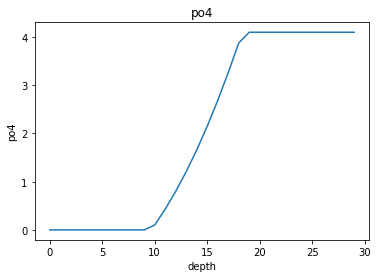

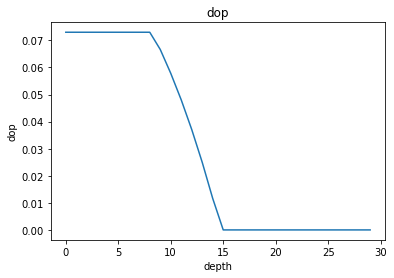

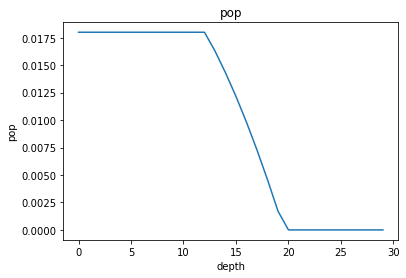

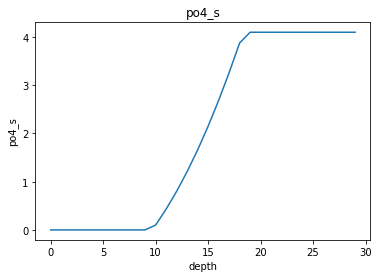

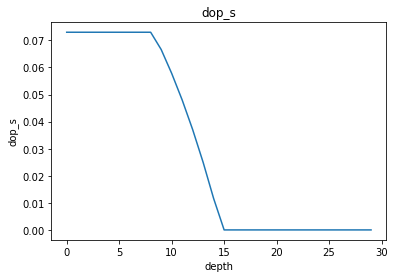

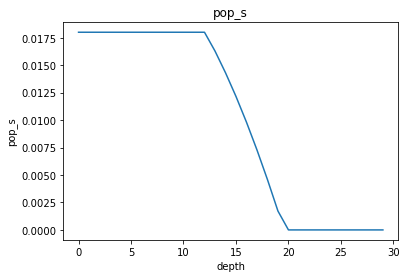

In [6]:
with xr.open_dataset(os.path.join(wdir, "gen_init_iterate", "init_iterate_00.nc")) as ds:
    plot_all_vars(ds)

<xarray.Dataset>
Dimensions:                (depth: 30, depth_edges: 31, nbnds: 2, time: 101)
Coordinates:
  * time                   (time) object 0001-01-01 00:00:00 ... 0002-01-01 00:00:00
  * depth                  (depth) float64 5.0 15.01 25.07 ... 775.1 825.0 875.0
  * depth_edges            (depth_edges) float64 0.0 10.0 20.02 ... 850.0 900.0
Dimensions without coordinates: nbnds
Data variables:
    depth_bounds           (depth, nbnds) float64 ...
    bldepth                (time) float64 ...
    mixing_coeff           (time, depth_edges) float64 ...
    po4                    (time, depth) float64 ...
    po4_time_mean          (depth) float64 ...
    po4_time_anom          (time, depth) float64 ...
    po4_time_delta         (depth) float64 ...
    po4_depth_int          (time) float64 ...
    dop                    (time, depth) float64 ...
    dop_time_mean          (depth) float64 ...
    dop_time_anom          (time, depth) float64 ...
    dop_time_delta         (depth) 

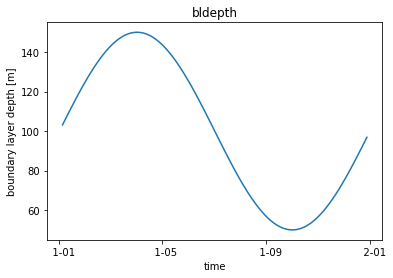

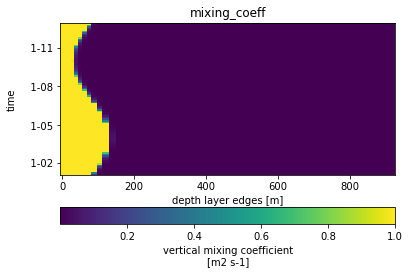

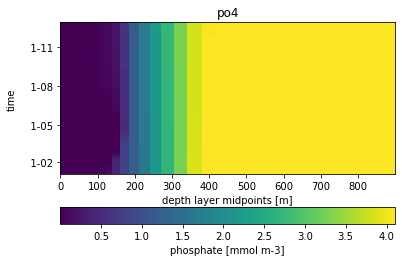

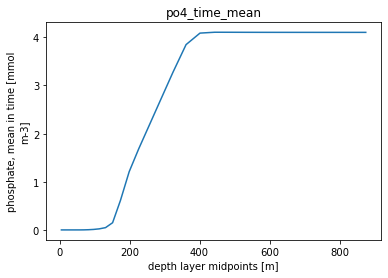

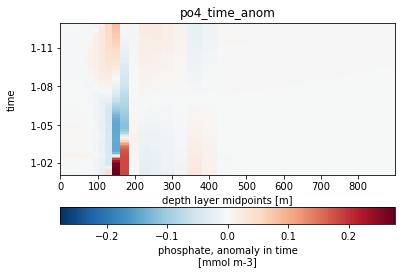

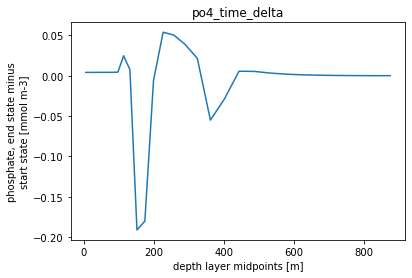

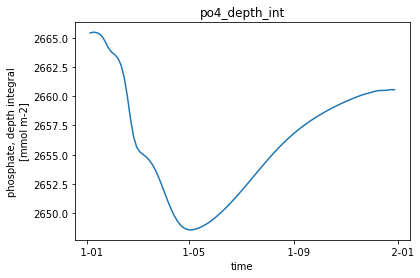

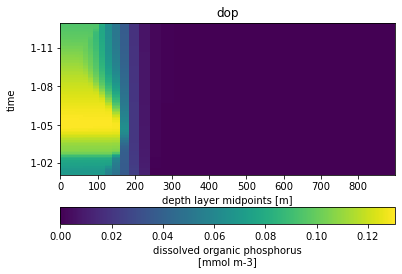

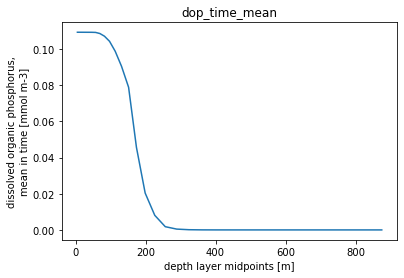

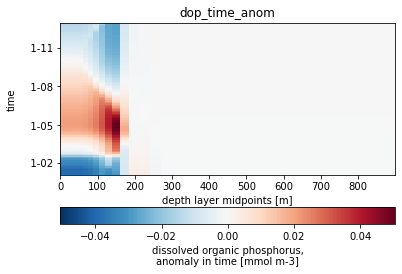

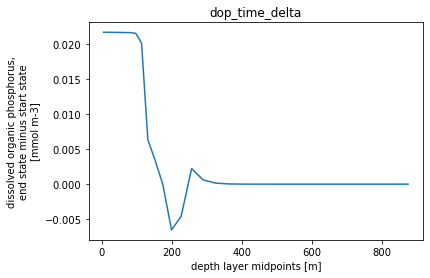

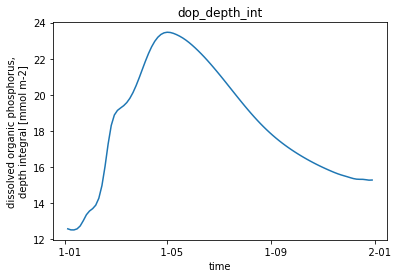

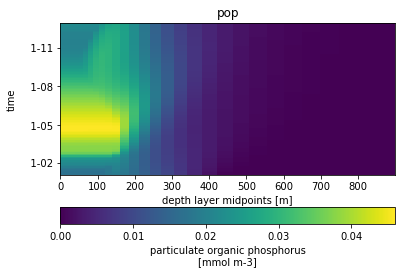

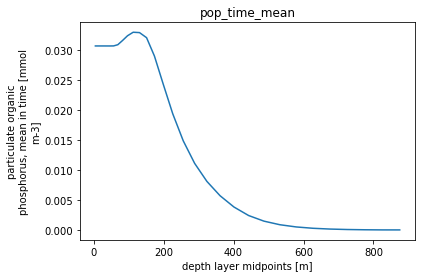

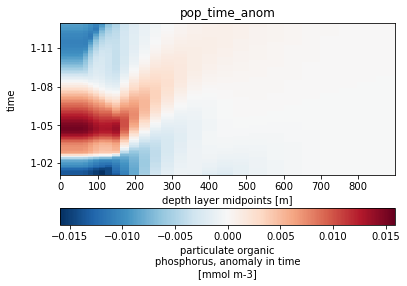

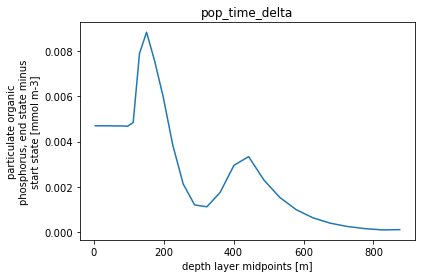

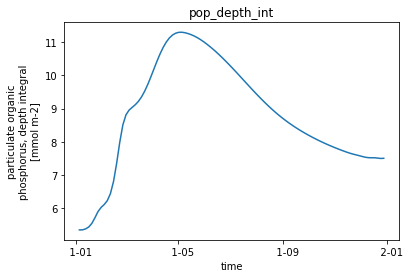

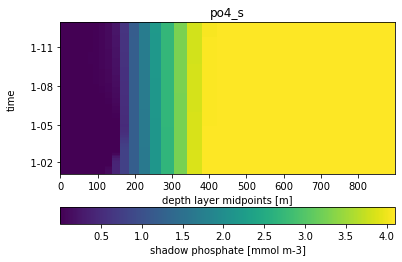

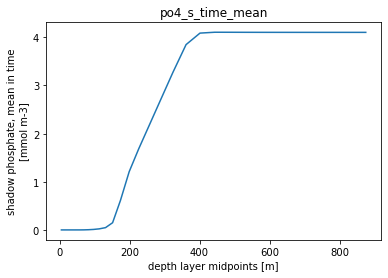

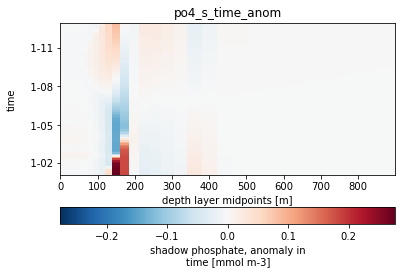

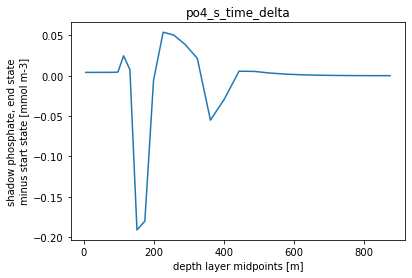

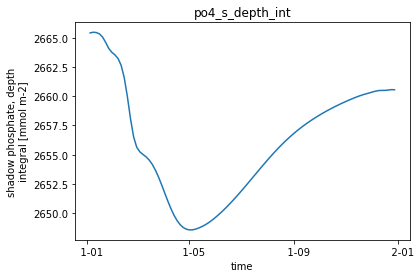

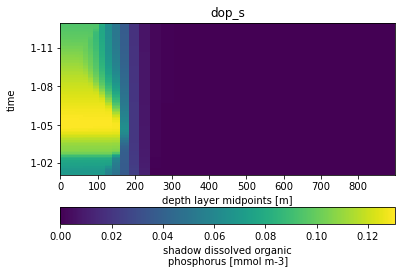

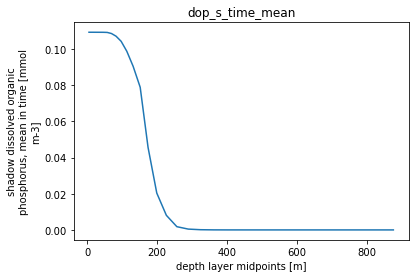

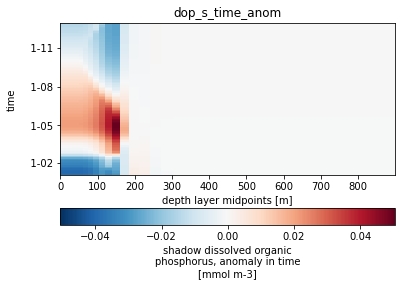

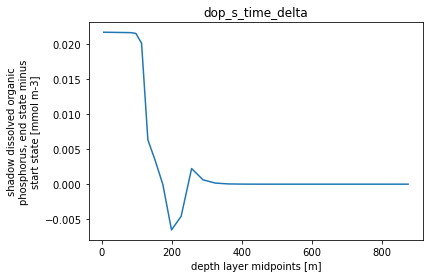

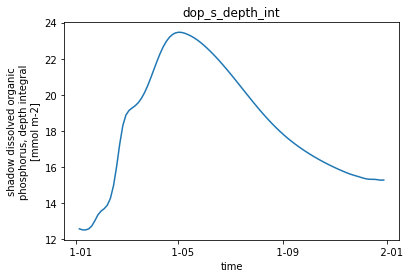

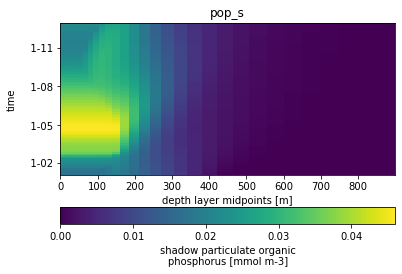

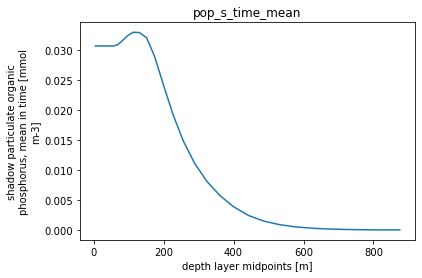

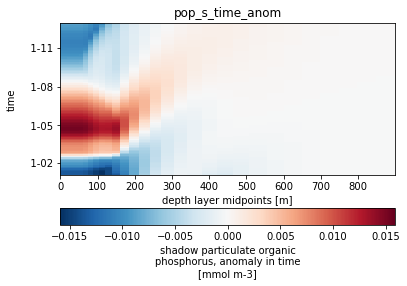

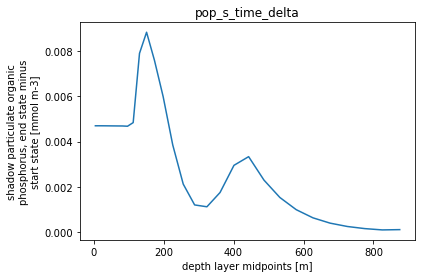

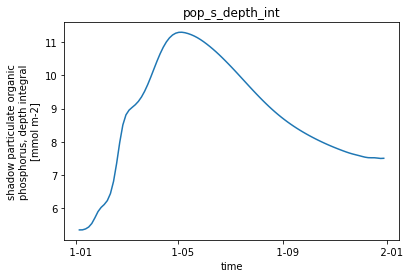

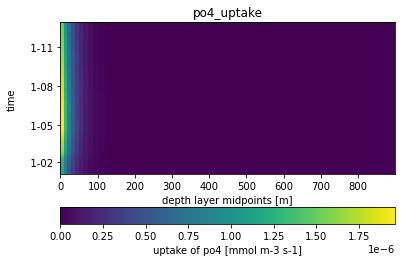

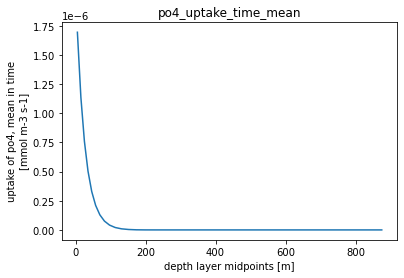

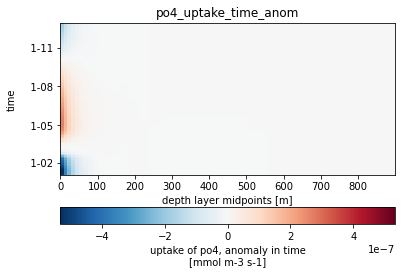

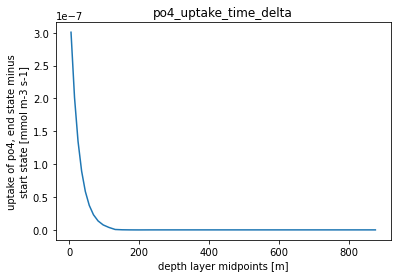

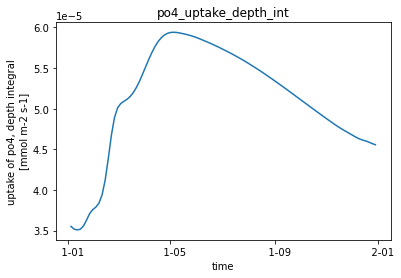

In [7]:
with xr.open_dataset(os.path.join(wdir, "gen_init_iterate", "hist_00.nc")) as ds:
    plot_all_vars(ds)

<xarray.Dataset>
Dimensions:  (depth: 30)
Dimensions without coordinates: depth
Data variables:
    po4      (depth) float64 ...
    dop      (depth) float64 ...
    pop      (depth) float64 ...
    po4_s    (depth) float64 ...
    dop_s    (depth) float64 ...
    pop_s    (depth) float64 ...
Attributes:
    history:  2020-06-03 16:21:34: created by src.test_problem.model_state.Mo...


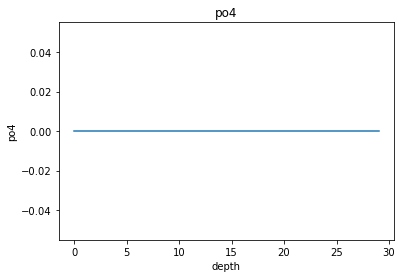

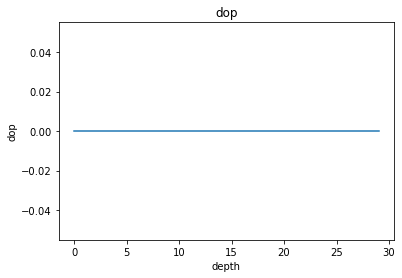

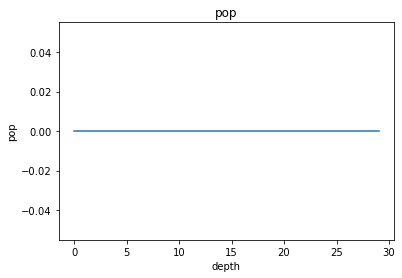

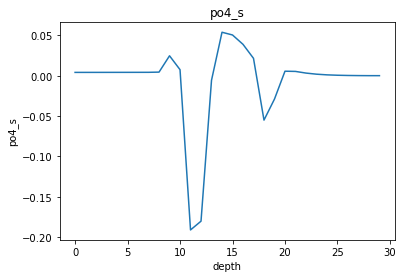

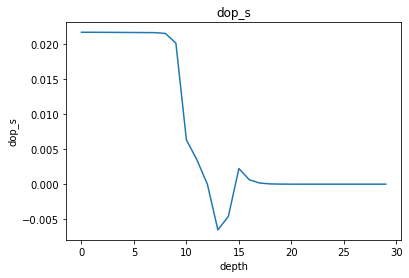

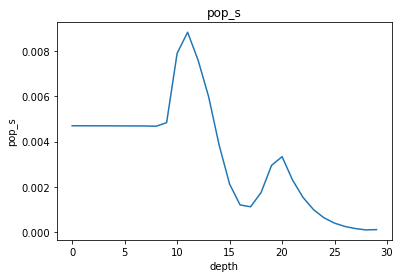

In [8]:
with xr.open_dataset(os.path.join(wdir, "gen_init_iterate", "fcn_00.nc")) as ds:
    plot_all_vars(ds)

<xarray.Dataset>
Dimensions:  (depth: 30)
Dimensions without coordinates: depth
Data variables:
    po4      (depth) float64 ...
    dop      (depth) float64 ...
    pop      (depth) float64 ...
    po4_s    (depth) float64 ...
    dop_s    (depth) float64 ...
    pop_s    (depth) float64 ...
Attributes:
    history:  2020-06-03 16:21:34: created by src.test_problem.model_state.Mo...


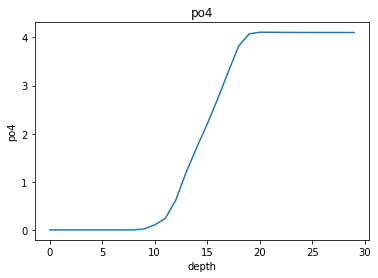

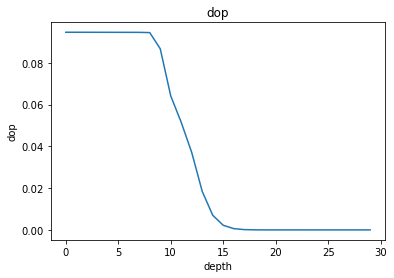

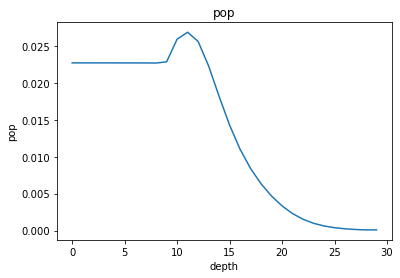

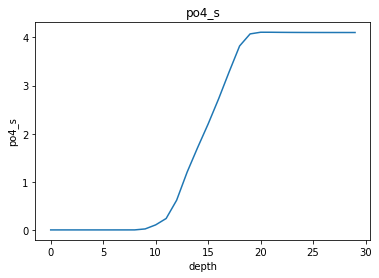

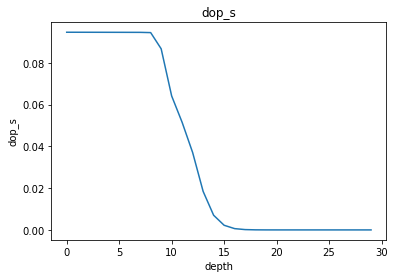

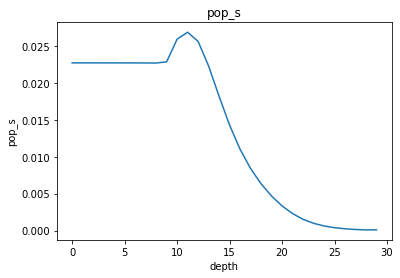

In [9]:
with xr.open_dataset(os.path.join(wdir, "gen_init_iterate", "init_iterate.nc")) as ds:
    plot_all_vars(ds)

In [10]:
try:
    nk_driver.main(nk_driver.parse_args(common_args + ["--persist"]))
except RuntimeError as err:
    print(str(err))
    print("number of maximum Newton iterations exceeded" not in str(err))
    if "number of maximum Newton iterations exceeded" not in str(err):
        raise

2020-06-03 16:21:43,687:57669:model_config.py:__init__:loading content from /Users/klindsay/codes/Newton-Krylov_OOC/input/test_problem/tracer_module_defs.yaml
2020-06-03 16:21:43,713:57669:model_config.py:check_shadow_tracers:tracer module phosphorus has po4_s as a shadow for po4
2020-06-03 16:21:43,714:57669:model_config.py:check_shadow_tracers:tracer module phosphorus has dop_s as a shadow for dop
2020-06-03 16:21:43,718:57669:model_config.py:check_shadow_tracers:tracer module phosphorus has pop_s as a shadow for pop
2020-06-03 16:21:43,720:57669:model_config.py:__init__:reading depth_delta from /Users/klindsay/test_run_phosphorus_wdir/depth_axis_test.nc for grid_weight
2020-06-03 16:21:43,726:57669:nk_driver.py:main:using class ModelState from src.test_problem.model_state for model state
2020-06-03 16:21:43,730:57669:solver_state.py:__init__:"Newton" iteration now 0
2020-06-03 16:22:05,856:57669:tracer_module_state_base.py:log_vals:iteration=00,iterate,mean[phosphorus]=5.962967e+00


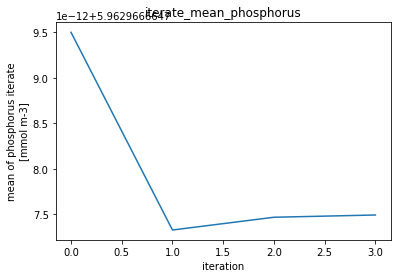

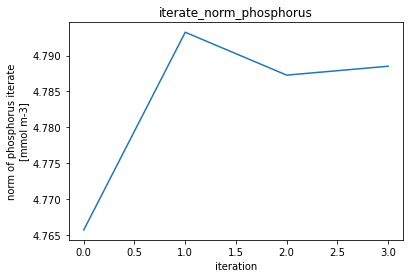

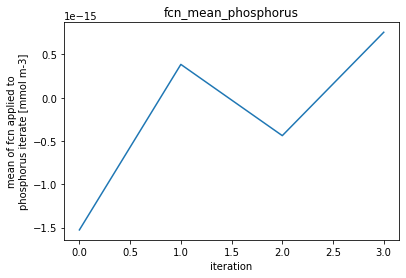

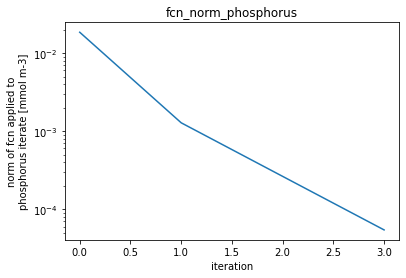

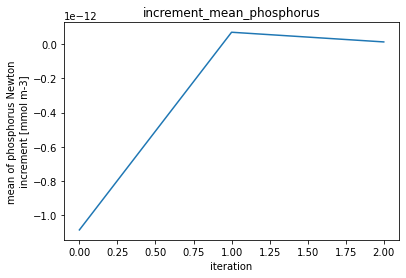

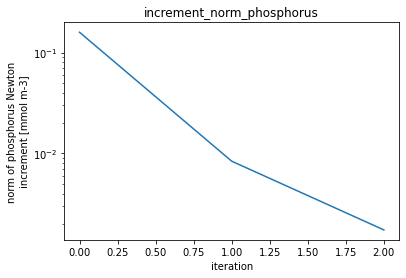

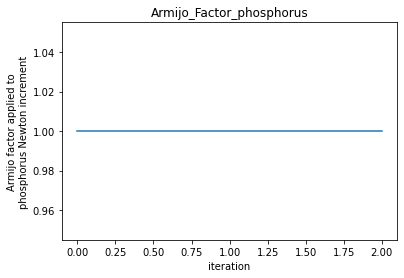

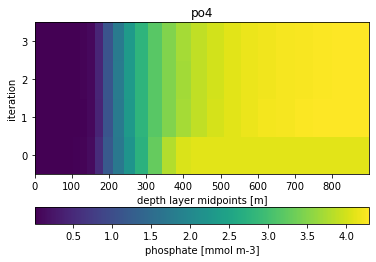

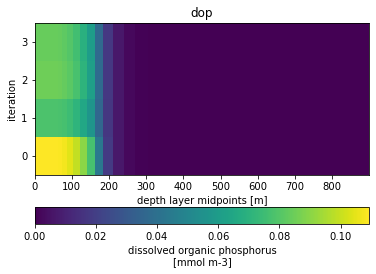

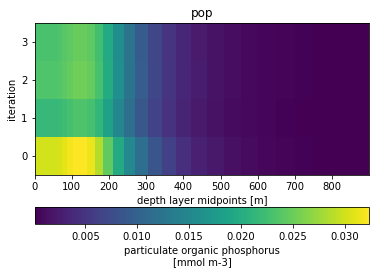

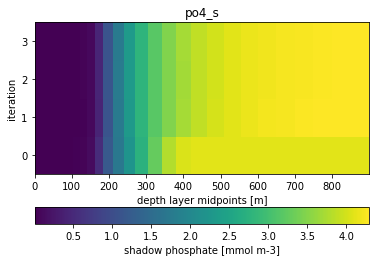

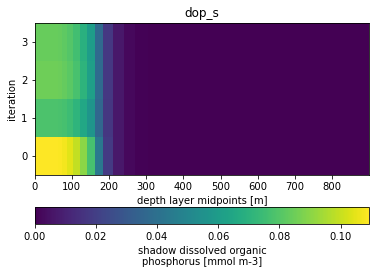

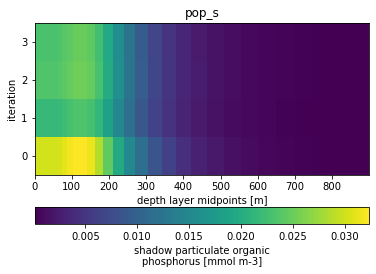

In [11]:
with xr.open_dataset(os.path.join(wdir, "Newton_stats.nc")) as ds:
    plot_all_vars(ds)
    iterations = len(ds["iteration"])

In [12]:
iter_str_final = f"{iterations-1:02d}"
print(iter_str_final)

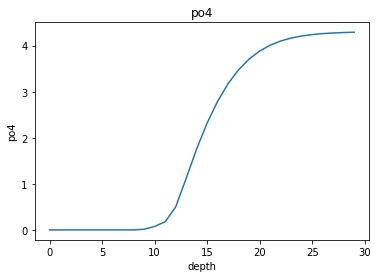

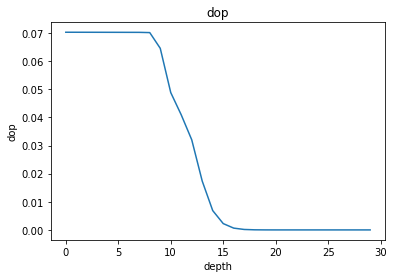

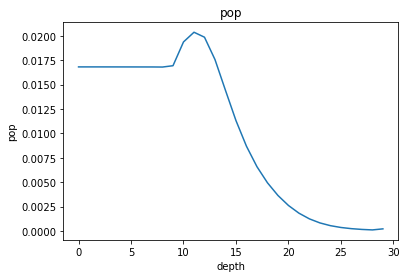

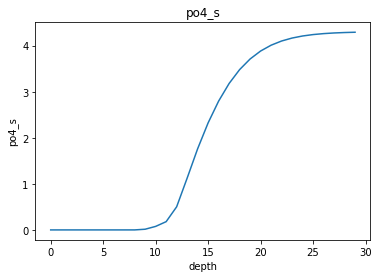

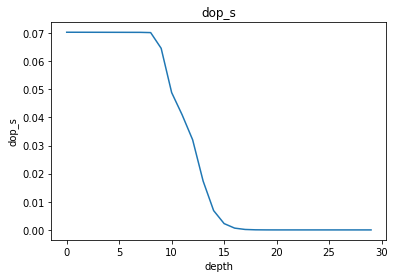

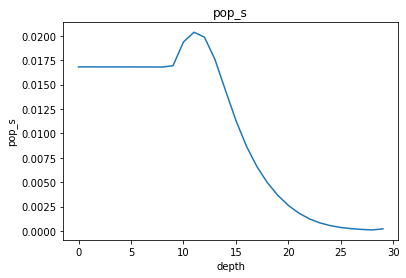

In [13]:
with xr.open_dataset(os.path.join(wdir, f"iterate_{iter_str_final}.nc")) as ds:
    plot_all_vars(ds)

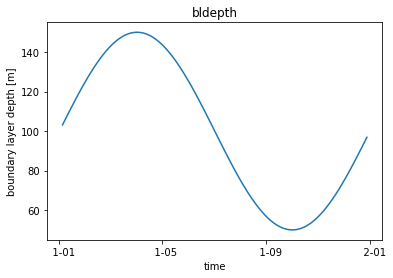

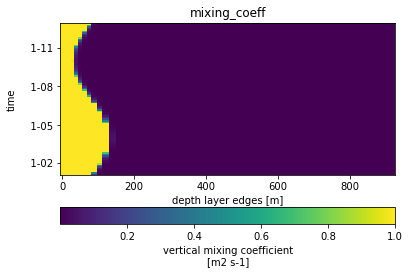

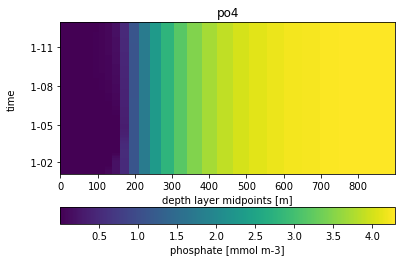

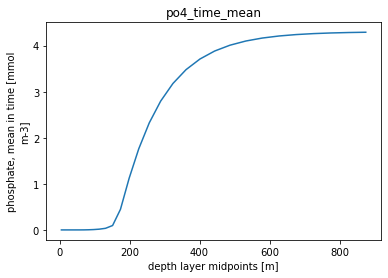

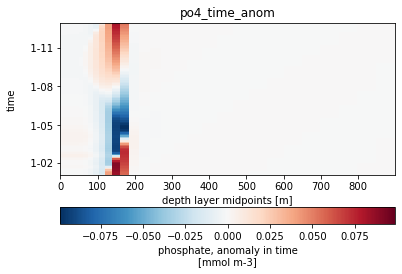

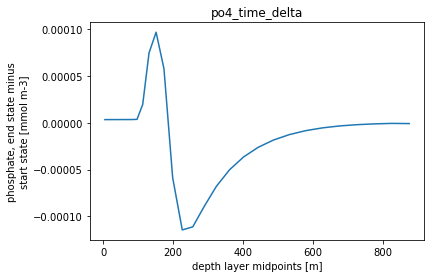

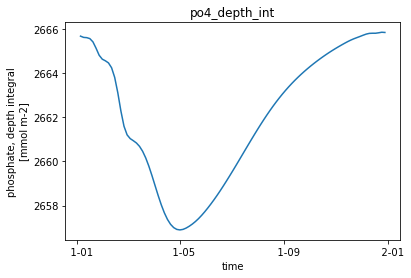

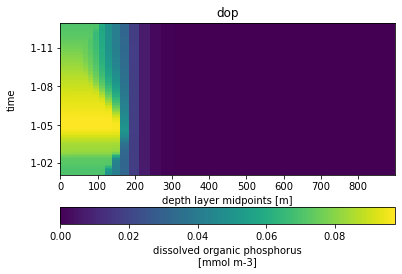

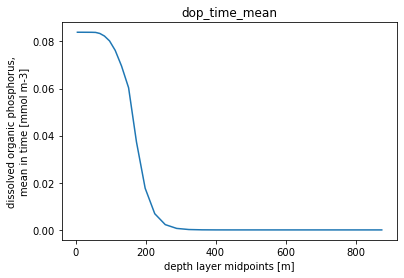

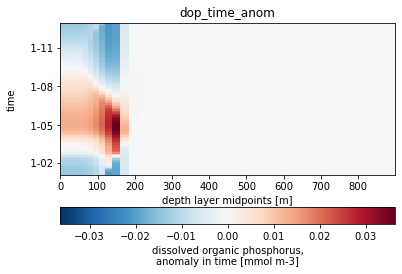

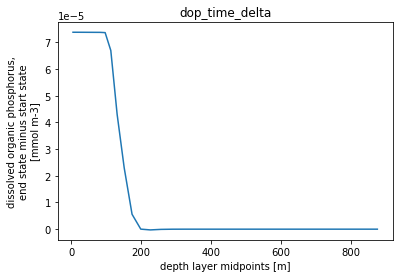

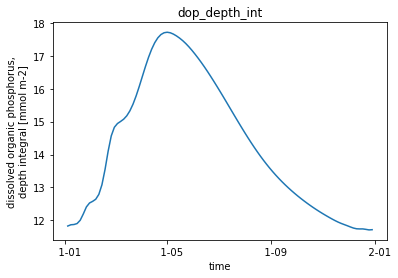

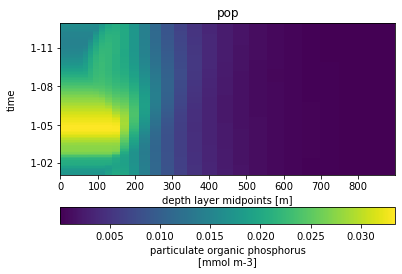

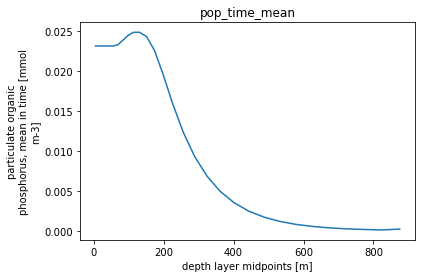

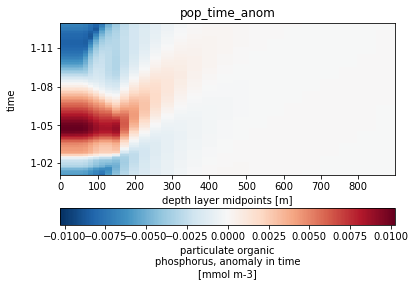

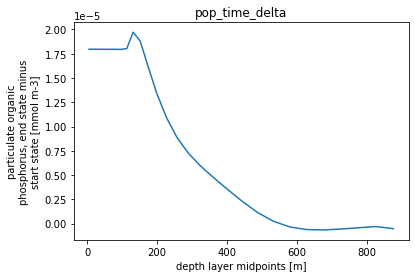

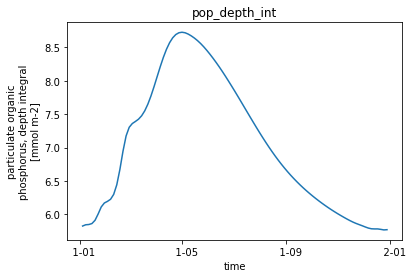

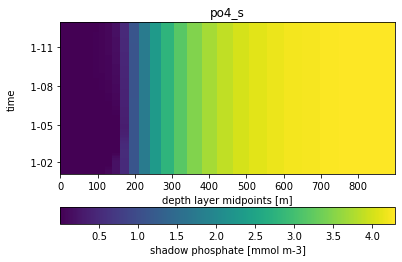

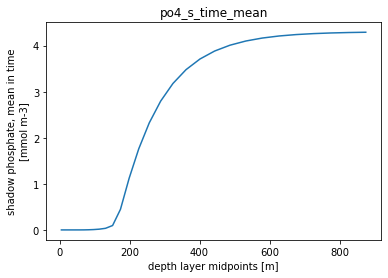

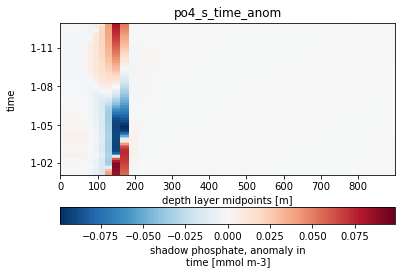

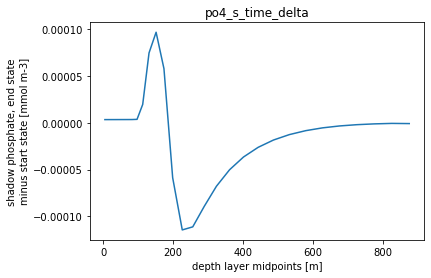

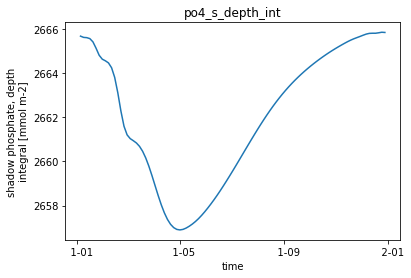

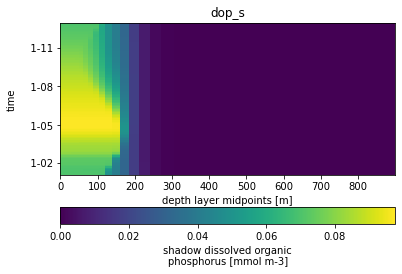

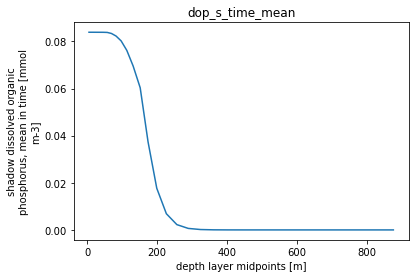

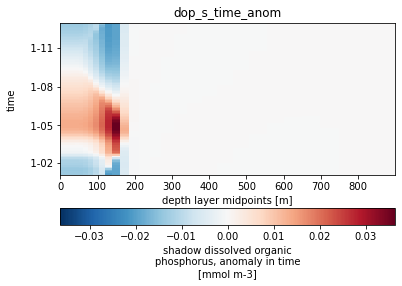

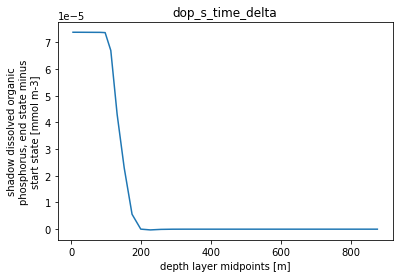

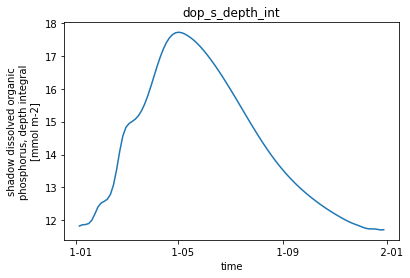

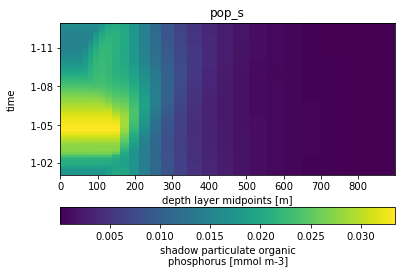

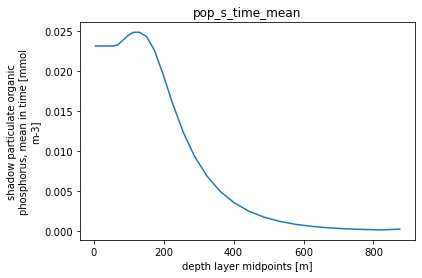

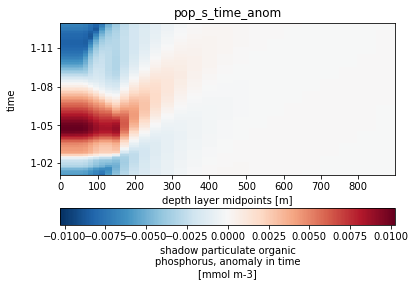

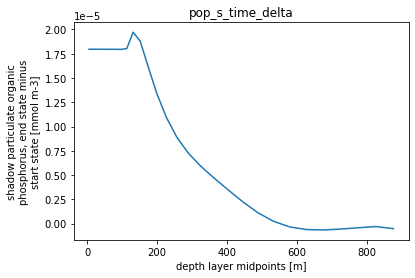

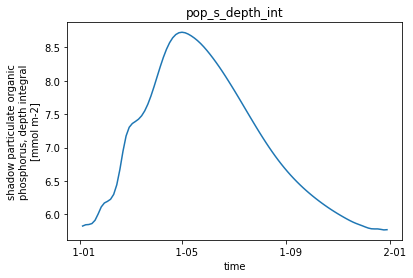

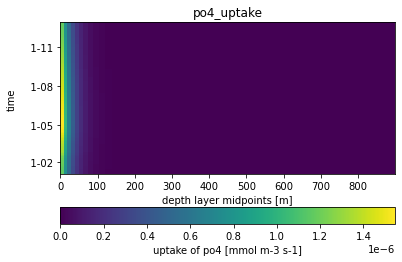

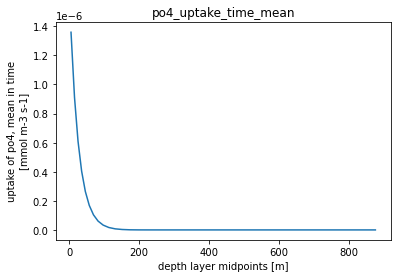

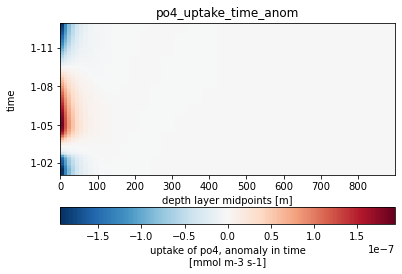

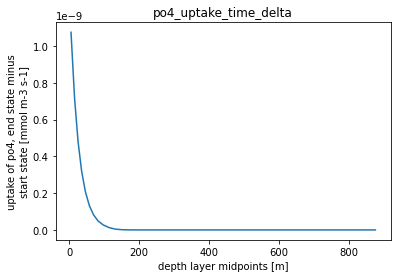

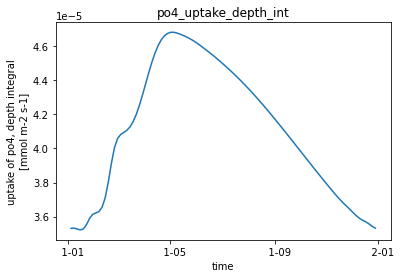

In [14]:
with xr.open_dataset(os.path.join(wdir, f"hist_{iter_str_final}.nc")) as ds:
    plot_all_vars(ds)

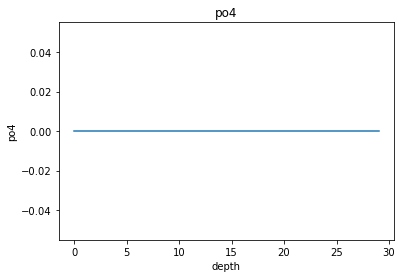

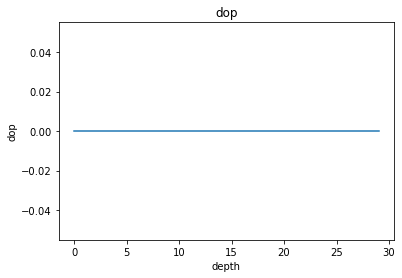

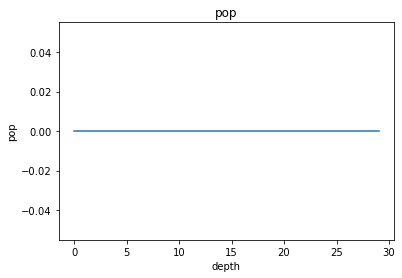

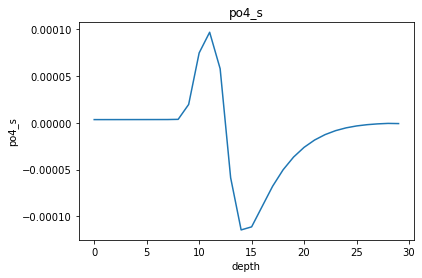

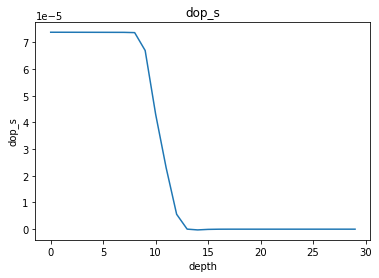

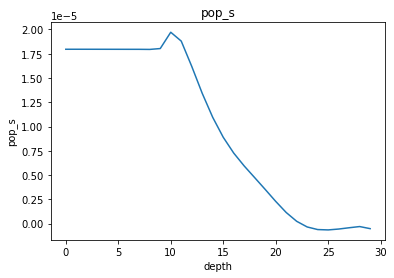

In [15]:
with xr.open_dataset(os.path.join(wdir, f"fcn_{iter_str_final}.nc")) as ds:
    plot_all_vars(ds)